## 1. Предобработка данных

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats as st

In [14]:
address_client = pd.read_csv(r'C:\WORK\STUDY\GIT\Данные для хакатона\address_client.csv', encoding = "utf-8", on_bad_lines='skip', 
names=['id_client_rf', 'address', 'flag_provider', 'nflag_have_free_ports', 'tech_name', 'latitude', 'longitude'])

base_info_client = pd.read_csv(r'C:\WORK\STUDY\GIT\Данные для хакатона\base_info_client.csv', encoding = "utf-8", 
names=['id_client_rf', 'name_rf', 'id_client', 'workersrange', 'total_revenue', 'companywithsameinfo', 'arbitrationcases',
'datefirstreg', 'flag_site', 'flag_business_center', 'flag_resident', 'date_actual_data', 'flag_vk'], parse_dates=['datefirstreg','date_actual_data'])

final_list = pd.read_csv(r'C:\WORK\STUDY\GIT\Данные для хакатона\final_list.csv', encoding = "utf-8", names=['id_client_rf'])

okved_industry_client = pd.read_csv(r'C:\WORK\STUDY\GIT\Данные для хакатона\okved_industry_client.csv', encoding = "utf-8", 
names = ['id_client_rf', 'Code_okved', 'Name_okved', 'Type_okved', 'Industry'])

sales = pd.read_excel(r'C:\WORK\STUDY\GIT\Данные для хакатона\sales.xlsx',
names = ['month_sale', 'day_sale', 'id_client_rf', 'sale_size'])

In [3]:
pd.set_option('display.max_columns', 50)
print('Размерность address_client:', address_client.shape[0])
print(address_client.info())
print('Размерность base_info_client:', base_info_client.shape[0])
print(base_info_client.info())
print('Размерность final_list:', final_list.shape[0])
print(final_list.info())
print('Размерность okved_industry_client:', okved_industry_client.shape[0])
print(okved_industry_client.info())
print('Размерность sales:', sales.shape[0])
print(sales.info())

Размерность address_client: 1485674
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1485674 entries, 0 to 1485673
Data columns (total 7 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   id_client_rf           1485674 non-null  object 
 1   address                1485674 non-null  object 
 2   flag_provider          1485674 non-null  int64  
 3   nflag_have_free_ports  1485674 non-null  int64  
 4   tech_name              736940 non-null   object 
 5   latitude               1259978 non-null  float64
 6   longitude              1259978 non-null  float64
dtypes: float64(2), int64(2), object(3)
memory usage: 79.3+ MB
None
Размерность base_info_client: 2218328
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2218328 entries, 0 to 2218327
Data columns (total 13 columns):
 #   Column                Dtype         
---  ------                -----         
 0   id_client_rf          int64         
 1   name_rf         

In [4]:
# Проверка кол-ва уникальных значений для столбцов, где должно быть булево значение
print('address_client:\n', address_client.nunique(), sep='')
print()
print('base_info_client:\n', base_info_client.nunique(), sep='')
print()
print('final_list:\n', final_list.nunique(), sep='')
print()
print('okved_industry_client:\n', okved_industry_client.nunique(), sep='')
print()
print('sales:\n', sales.nunique(), sep='')

address_client:
id_client_rf             587676
address                  183457
flag_provider                 2
nflag_have_free_ports         2
tech_name                    40
latitude                 114296
longitude                116575
dtype: int64

base_info_client:
id_client_rf            2218328
name_rf                      13
id_client               2218328
workersrange                 11
total_revenue              1559
companywithsameinfo         135
arbitrationcases            575
datefirstreg              12865
flag_site                     2
flag_business_center          2
flag_resident                 2
date_actual_data           4551
flag_vk                       2
dtype: int64

final_list:
id_client_rf    1950766
dtype: int64

okved_industry_client:
id_client_rf    2139266
Code_okved         2470
Name_okved         2396
Type_okved            2
Industry             33
dtype: int64

sales:
month_sale         7
day_sale         193
id_client_rf    9316
sale_size          3


In [32]:
# 1. address_client
address_client.head()

id_client_rf                              address  flag_provider  \
0  00840127_Ф13  уфа г.\, лесотехникума улица\, 49/1              1   
1  00840181_Ф13  уфа г.\, лесотехникума улица\, 49/1              1   
2  00839528_Ф13  уфа г.\, лесотехникума улица\, 49/1              1   
3  00839607_Ф13  уфа г.\, лесотехникума улица\, 49/1              1   
4  00075449_Ф13  уфа г.\, лесотехникума улица\, 49/1              1   

   nflag_have_free_ports tech_name  latitude  longitude  
0                      0       NaN       NaN        NaN  
1                      0       NaN       NaN        NaN  
2                      0       NaN       NaN        NaN  
3                      0       NaN       NaN        NaN  
4                      0       NaN       NaN        NaN

In [43]:
# Разделение столбца tech_name на отдельные столбцы под каждую технологию
# tech_dummies = tech_dummies.groupby(lambda x: x.split('_')[1], axis=1).max()
tech_dummies = pd.get_dummies(address_client['tech_name'].str.split(', ', expand=True), dummy_na=True)
tech_dummies.columns = tech_dummies.columns.map(lambda x: x.replace('\\', '').split('_')[-1])
tech_dummies = tech_dummies.groupby(lambda x: x, axis=1).max()
address_client = pd.concat([address_client, tech_dummies], axis=1)
address_client.head()

id_client_rf                              address  flag_provider  \
0  00840127_Ф13  уфа г.\, лесотехникума улица\, 49/1              1   
1  00840181_Ф13  уфа г.\, лесотехникума улица\, 49/1              1   
2  00839528_Ф13  уфа г.\, лесотехникума улица\, 49/1              1   
3  00839607_Ф13  уфа г.\, лесотехникума улица\, 49/1              1   
4  00075449_Ф13  уфа г.\, лесотехникума улица\, 49/1              1   

   nflag_have_free_ports tech_name  latitude  longitude   ETTH   FTTx    PON  \
0                      0       NaN       NaN        NaN  False  False  False   
1                      0       NaN       NaN        NaN  False  False  False   
2                      0       NaN       NaN        NaN  False  False  False   
3                      0       NaN       NaN        NaN  False  False  False   
4                      0       NaN       NaN        NaN  False  False  False   

    nan   xDSL   БШПД  Оптика  
0  True  False  False   False  
1  True  False  False   False  
2  True  False  False   False  
3  True  False  False   False  
4  True  False  False   False

In [45]:
# Проверяем корректность работы фунции по разделению столбца tech_name
address_client[address_client['tech_name']=='PON\, xDSL\, ETTH'].head()
# df.to_csv(r'C:\WORK\STUDY\GIT\Данные для хакатона\address_client_clear.csv')

id_client_rf                                            address  \
7533   01803404_Ф05  445019\, самарская обл\, тольятти г.\, горьког...   
8526   01803685_Ф05  445019\, самарская обл\, тольятти г.\, горьког...   
27936  00247680_Ф05  445019\, самарская обл\, тольятти г.\, горьког...   
28565  00247845_Ф05  445019\, самарская обл\, тольятти г.\, горьког...   
65312  01788975_Ф03  460019\, оренбургская обл\, оренбург г.\, шарл...   

       flag_provider  nflag_have_free_ports          tech_name   latitude  \
7533               1                      0  PON\, xDSL\, ETTH  53.518754   
8526               1                      0  PON\, xDSL\, ETTH  53.518754   
27936              1                      0  PON\, xDSL\, ETTH  53.518754   
28565              1                      0  PON\, xDSL\, ETTH  53.518754   
65312              1                      1  PON\, xDSL\, ETTH  51.843896   

       longitude  ETTH   FTTx   PON   nan  xDSL   БШПД  Оптика  
7533   49.405813  True  False  True  True  True  False   False  
8526   49.405813  True  False  True  True  True  False   False  
27936  49.405813  True  False  True  True  True  False   False  
28565  49.405813  True  False  True  True  True  False   False  
65312  55.117706  True  False  True  True  True  False   False

In [14]:
address_client['tech_name'].value_counts()

tech_name
xDSL                        463692
xDSL\, ETTH                  92202
ETTH\, xDSL                  91206
ETTH                         50836
PON                           9822
FTTx\, xDSL                   2874
PON\, xDSL                    2744
PON\, xDSL\, ETTH             2574
xDSL\, FTTx                   2280
xDSL\, PON                    2220
ETTH\, xDSL\, PON             1950
ETTH\, PON                    1812
FTTx\, xDSL\, ETTH            1792
xDSL\, PON\, ETTH             1500
xDSL\, ETTH\, PON             1498
ETTH\, FTTx\, xDSL            1292
ETTH\, PON\, xDSL             1214
PON\, ETTH                    1000
FTTx\, ETTH\, xDSL             808
ETTH\, xDSL\, FTTx             778
PON\, ETTH\, xDSL              742
xDSL\, ETTH\, FTTx             704
xDSL\, FTTx\, ETTH             562
FTTx                           518
БШПД                            84
ETTH\, PON\, xDSL\, FTTx        70
xDSL\, PON\, FTTx               66
PON\, FTTx\, xDSL\, ETTH        20
xDSL\, БШП

In [72]:
# Определение геополигонов
# !pip install geopy
import math

import pandas as pd
from geopy.distance import geodesic
from geopy.point import Point


class Point:
    latitude = 0
    longitude = 0

    def __init__(self, latitude, longitude):
        self.latitude = latitude
        self.longitude = longitude


def check_points_distance_within_radius(point_a: Point, point_b: Point, radius):
 distance = geodesic(point_a, point_b).meters
 print(f'Distance: {distance}')
 if (distance <= radius):
  return True
 else:
  return False


def check_point_distance_and_points_list_within_radius(point_a: Point, dataframe: pd.DataFrame, radius):
    latitude_column_index = dataframe.columns.get_loc('latitude')
    longitude_column_index = dataframe.columns.get_loc('longitude')

    for index, row in dataframe.iterrows():
        if (math.isnan(row[latitude_column_index]) or math.isnan(row[longitude_column_index])):
            print('Coord is Nan')
            continue

        point_b = Point(row[latitude_column_index], row[longitude_column_index])
        if (check_points_distance_within_radius(point_a, point_b, radius)):
            return True

    return False

In [ ]:
base_info_client_with_coord = base_info_client.merge(address_client, how='left', on='id_client_rf')
final_list_with_coord = final_list.merge(address_client, how='left', on='id_client_rf')
final_list_with_distance_check = final_list_with_coord.assign(provider_in_50m = check_point_distance_and_points_list_within_radius(Point(final_list_with_coord['latitude'], final_list_with_coord['longitude']), base_info_client_with_coord, 50))

In [42]:
address_client[address_client['latitude'].notnull()==True].head(5000)

id_client_rf                                            address  \
1014  02176300_Ф13  452800\, башкортостан респ\, янаульский р-н\, ...   
1019  02176300_Ф13  453431\, башкортостан респ\, благовещенский р-...   
1023  02176300_Ф13  453149\, башкортостан респ\, стерлитамакский р...   
1026  02176300_Ф13  453550\, башкортостан респ\, белорецкий р-н\, ...   
1028  02176300_Ф13  452685\, башкортостан респ\, нефтекамск г.\, л...   
...            ...                                                ...   
9960  00596613_Ф01  612600\, кировская обл\, котельничский р-н\, к...   
9963  02035555_Ф13  450022\, башкортостан респ\, уфа г.\, минигали...   
9965  01980847_Ф12  423815\, татарстан респ\, набережные челны г.\...   
9967  00596630_Ф01  612600\, кировская обл\, котельничский р-н\, к...   
9968  00443573_Ф02  607615\, нижегородская обл\, богородский р-н\,...   

      flag_provider  nflag_have_free_ports tech_name   latitude  longitude  
1014              0                      0      xDSL  56.282250  54.941762  
1019              1                      0      xDSL  55.049895  55.964907  
1023              0                      0      xDSL  53.807467  56.098343  
1026              0                      0      xDSL  53.838889  57.454413  
1028              1                      0      xDSL  56.094334  54.233593  
...             ...                    ...       ...        ...        ...  
9960              0                      1       NaN  58.299085  48.332641  
9963              1                      0       NaN  54.721858  55.995702  
9965              1                      0       NaN  55.747692  52.444625  
9967              0                      1       NaN  58.304571  48.349143  
9968              1                      0      xDSL  56.152209  43.400755  

[5000 rows x 7 columns]

In [46]:
# Функция определения ближайших компаний chat_gpt:
from tqdm.notebook import tqdm
from math import radians, sin, cos, sqrt, atan2
pbar = tqdm()
def haversine(lat1, lon1, lat2, lon2):
    R = 6371  # radius of the earth in km
    dlat = radians(lat2 - lat1)
    dlon = radians(lon2 - lon1)
    a = sin(dlat / 2) ** 2 + cos(radians(lat1)) * cos(radians(lat2)) * sin(dlon / 2) ** 2
    c = 2 * atan2(sqrt(a), sqrt(1 - a))
    return R * c * 1000  # distance in meters

df = address_client[address_client['latitude'].notnull()==True].head(1000)
df['has_nearby_company'] = 0

pbar.reset(total=len(df))
for i, row in df.iterrows():
    lat1, lon1 = row['latitude'], row['longitude']
    for j, other_row in df.iterrows():
        if i != j:
            lat2, lon2 = other_row['latitude'], other_row['longitude']
            dist = haversine(lat1, lon1, lat2, lon2)
            if dist <= 50:
                df.at[i, 'has_nearby_company'] = 1
                break
    pbar.update()             
pbar.refresh()

df.head()            
            

0it [00:00, ?it/s]

id_client_rf                                            address  \
1014  02176300_Ф13  452800\, башкортостан респ\, янаульский р-н\, ...   
1019  02176300_Ф13  453431\, башкортостан респ\, благовещенский р-...   
1023  02176300_Ф13  453149\, башкортостан респ\, стерлитамакский р...   
1026  02176300_Ф13  453550\, башкортостан респ\, белорецкий р-н\, ...   
1028  02176300_Ф13  452685\, башкортостан респ\, нефтекамск г.\, л...   

      flag_provider  nflag_have_free_ports tech_name   latitude  longitude  \
1014              0                      0      xDSL  56.282250  54.941762   
1019              1                      0      xDSL  55.049895  55.964907   
1023              0                      0      xDSL  53.807467  56.098343   
1026              0                      0      xDSL  53.838889  57.454413   
1028              1                      0      xDSL  56.094334  54.233593   

       ETTH   FTTx    PON   nan  xDSL   БШПД  Оптика  has_nearby_company  
1014  False  False  False  True  True  False   False                   1  
1019  False  False  False  True  True  False   False                   1  
1023  False  False  False  True  True  False   False                   1  
1026  False  False  False  True  True  False   False                   1  
1028  False  False  False  True  True  False   False                   1

In [47]:
df[df['has_nearby_company']==0]

id_client_rf                                            address  \
1173  02176675_Ф13  453166\, башкортостан респ\, стерлитамакский р...   
1177  02176675_Ф13  452455\, башкортостан респ\, бирский р-н\, бир...   
1180  02176675_Ф13  452120\, башкортостан респ\, альшеевский р-н\,...   
1183  02176675_Ф13  452810\, башкортостан респ\, янаульский р-н\, ...   
1188  02176675_Ф13  453142\, башкортостан респ\, стерлитамакский р...   
...            ...                                                ...   
2954  00391014_Ф11  428020\, чувашская республика\, чебоксары г.\,...   
2964  00391014_Ф11  428009\, чувашская республика\, чебоксары г.\,...   
2973  00391014_Ф11  428023\, чувашская республика\, чебоксары г.\,...   
2982  00391014_Ф11  428008\, чувашская республика\, чебоксары г.\,...   
2991  00391014_Ф11  428022\, чувашская республика\, чебоксары г.\,...   

      flag_provider  nflag_have_free_ports           tech_name   latitude  \
1173              0                      0                xDSL  53.728610   
1177              0                      0                xDSL  55.433430   
1180              0                      0                xDSL  54.071569   
1183              0                      0                xDSL  56.232834   
1188              0                      0                xDSL  53.418332   
...             ...                    ...                 ...        ...   
2954              1                      1  ETTH\, FTTx\, xDSL  56.114852   
2964              1                      1         xDSL\, ETTH  56.149316   
2973              1                      1                xDSL  56.093008   
2982              1                      1                xDSL  56.136532   
2991              1                      1                xDSL  56.131872   

      longitude   ETTH   FTTx    PON   nan  xDSL   БШПД  Оптика  \
1173  55.515822  False  False  False  True  True  False   False   
1177  55.552698  False  False  False  True  True  False   False   
1180  54.943882  False  False  False  True  True  False   False   
1183  54.542066  False  False  False  True  True  False   False   
1188  55.739888  False  False  False  True  True  False   False   
...         ...    ...    ...    ...   ...   ...    ...     ...   
2954  47.260762   True   True  False  True  True  False   False   
2964  47.166628   True  False  False  True  True  False   False   
2973  47.285682  False  False  False  True  True  False   False   
2982  47.277022  False  False  False  True  True  False   False   
2991  47.276150  False  False  False  True  True  False   False   

      has_nearby_company  
1173                   0  
1177                   0  
1180                   0  
1183                   0  
1188                   0  
...                  ...  
2954                   0  
2964                   0  
2973                   0  
2982                   0  
2991                   0  

[97 rows x 15 columns]

In [46]:
# 2. base_info_client
base_info_client.head()

id_client_rf name_rf     id_client  workersrange  total_revenue  \
0  1631354_Ф09     Ф09  01631354_Ф09           NaN              0   
1  1631368_Ф09     Ф09  01631368_Ф09           NaN              0   
2  1631377_Ф09     Ф09  01631377_Ф09           NaN              0   
3  1631387_Ф09     Ф09  01631387_Ф09           NaN              0   
4  1631409_Ф09     Ф09  01631409_Ф09           NaN              0   

   companywithsameinfo  arbitrationcases datefirstreg  flag_site  \
0                  1.0               NaN   2020-01-29          0   
1                  1.0               NaN   2020-07-31          0   
2                  1.0               NaN   2020-08-17          0   
3                  1.0               NaN   2019-12-23          0   
4                  1.0               NaN   2020-10-19          0   

   flag_business_center  flag_resident date_actual_data  flag_vk  
0                     0              0              NaT        0  
1                     0              0              NaT        0  
2                     0              0              NaT        0  
3                     0              0              NaT        0  
4                     0              0              NaT        0

In [31]:
# Смотрим в каком формате хранятся записи workersrange. Нужно будет оставить только правую часть.
# base_info_client[base_info_client['workersrange'].notnull()==True]
# Переводим workersrange в числовой формат по правой цифре. 
base_info_client['workersrange'] = base_info_client['workersrange'].str.replace('(.* \.\. )|(.*\.\.)','', regex=True).dropna().astype(int)
# Переводим id_client_rf в такой же формат, как и в других таблицах
# base_info_client['id_client_rf'] = base_info_client['id_client_rf'].astype(str)+'_'+base_info_client['name_rf'].astype(str)
# Меняем заголовки местами, поскольку в датафрейме они перепутаны
base_info_client.rename(columns={'id_client_rf': 'id_client', 'id_client': 'id_client_rf'}, inplace=True)
base_info_client.head(1)

id_client name_rf  id_client_rf  workersrange  total_revenue  \
0    1631354     Ф09  01631354_Ф09           NaN              0   

   companywithsameinfo  arbitrationcases datefirstreg  flag_site  \
0                  1.0               NaN   2020-01-29          0   

   flag_business_center  flag_resident date_actual_data  flag_vk  
0                     0              0              NaT        0

In [8]:
# 3. final_list
final_list.head()

id_client_rf
0  01768987_Ф04
1  01769012_Ф04
2  01769016_Ф04
3  01769018_Ф04
4  01769044_Ф04

In [9]:
# 4. okved_industry_client
okved_industry_client.head()

id_client_rf Code_okved                                         Name_okved  \
0  00811390_Ф13    47.91.2  Торговля розничная\, осуществляемая непосредст...   
1  01516426_Ф10    47.91.2  Торговля розничная\, осуществляемая непосредст...   
2  01258497_Ф06    47.91.2  Торговля розничная\, осуществляемая непосредст...   
3  01583065_Ф12    47.91.2  Торговля розничная\, осуществляемая непосредст...   
4  01506195_Ф04    47.91.2  Торговля розничная\, осуществляемая непосредст...   

   Type_okved         Industry  
0           1  Интернет-бизнес  
1           1  Интернет-бизнес  
2           1  Интернет-бизнес  
3           1  Интернет-бизнес  
4           1  Интернет-бизнес

In [47]:
# 5. sales
sales.head()
# sales['sale_size'].unique()

month_sale   day_sale  id_client_rf  sale_size
0 2023-03-01 2023-03-16  00309682_Ф12          3
1 2023-03-01 2023-03-16  00309999_Ф12          3
2 2023-03-01 2023-03-07  00333129_Ф12          3
3 2023-03-01 2023-03-24  00333306_Ф12          3
4 2023-03-01 2023-03-07  00333741_Ф12          3

In [15]:
# Переводим sale_size в цифровой формат
sales['sale_size'] = np.where(sales['sale_size']=='High     ', 3,
 np.where(sales['sale_size']=='Middle   ', 2,
 np.where(sales['sale_size']=='Low      ', 1, 0)))



In [39]:
# Рассчитываем столбец кол-ва дней с даты регистрации компании до покупки
df_delta_date = sales_clients.merge(base_info_client, how='left', on='id_client_rf' )
df_delta_date['delta_date'] = (df_delta_date['month_sale'] - df_delta_date['datefirstreg']).astype('int64')/ 10**9  
print(sales_clients.info())
print(df_delta_date.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9316 entries, 0 to 9315
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   id_client_rf  9316 non-null   object        
 1   month_sale    9316 non-null   datetime64[ns]
 2   sale_size     9316 non-null   int32         
 3   sale_count    9316 non-null   int64         
dtypes: datetime64[ns](1), int32(1), int64(1), object(1)
memory usage: 254.9+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9316 entries, 0 to 9315
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   id_client_rf          9316 non-null   object        
 1   month_sale            9316 non-null   datetime64[ns]
 2   sale_size             9316 non-null   int32         
 3   sale_count            9316 non-null   int64         
 4   id_client             9316 non-null   int64     

In [ ]:
#преобразуем month_sale
month_sale_mapping = {'2023-01-01': 1, '2023-02-01': 2, '2023-03-01': 3,
                      '2023-04-01': 4, '2023-05-01': 5, '2023-06-01': 6, '2023-07-01': 7}
sales['month_sale'] = sales['month_sale'].replace(month_sale_mapping)

In [12]:
df_delta_date

month_sale   day_sale  id_client_rf  sale_size  id_client name_rf  \
0               3 2023-03-16  00309682_Ф12          0     309682     Ф12   
1               3 2023-03-16  00309999_Ф12          0     309999     Ф12   
2               3 2023-03-07  00333129_Ф12          0     333129     Ф12   
3               3 2023-03-24  00333306_Ф12          0     333306     Ф12   
4               3 2023-03-07  00333741_Ф12          0     333741     Ф12   
...           ...        ...           ...        ...        ...     ...   
10423           7 2023-07-03  01849307_Ф09          0    1849307     Ф09   
10424           7 2023-07-27  01636869_Ф09          0    1636869     Ф09   
10425           7 2023-07-27  01636906_Ф09          0    1636906     Ф09   
10426           7 2023-07-17  01631795_Ф09          0    1631795     Ф09   
10427           7 2023-07-17  01632077_Ф09          0    1632077     Ф09   

       workersrange  total_revenue  companywithsameinfo  arbitrationcases  \
0               NaN              2                  2.0               NaN   
1               NaN              2                  2.0               NaN   
2               NaN              2                  1.0               NaN   
3               NaN              1                  2.0               NaN   
4               NaN              2                  1.0               NaN   
...             ...            ...                  ...               ...   
10423           NaN              0                  1.0               1.0   
10424           NaN              0                  NaN               NaN   
10425           NaN              0                  NaN               NaN   
10426           NaN              0                  NaN               NaN   
10427           NaN              0                  NaN               NaN   

      datefirstreg  flag_site  flag_business_center  flag_resident  \
0       2015-07-22          0                     0              1   
1       2015-07-22          0                     0              1   
2       2020-12-22          0                     0              0   
3       2019-05-31          1                     1              0   
4       2020-12-22          0                     0              0   
...            ...        ...                   ...            ...   
10423   2023-04-12          0                     0              0   
10424   2023-04-27          0                     0              0   
10425   2023-04-27          0                     0              0   
10426   2023-06-14          0                     0              0   
10427   2023-06-14          0                     0              0   

      date_actual_data  flag_vk  
0           2017-03-01        0  
1           2017-03-01        0  
2                  NaT        0  
3           2022-08-04        0  
4                  NaT        0  
...                ...      ...  
10423              NaT        0  
10424              NaT        0  
10425              NaT        0  
10426              NaT        0  
10427              NaT        0  

[10428 rows x 16 columns]

In [8]:
# df_delta_date['delta_date'] = (df_delta_date['month_sale'] - df_delta_date['datefirstreg']).astype('int64')/ 10**9 
df_delta_date.head()

month_sale   day_sale  id_client_rf  sale_size  id_client name_rf  \
0 2023-03-01 2023-03-16  00309682_Ф12          3     309682     Ф12   
1 2023-03-01 2023-03-16  00309999_Ф12          3     309999     Ф12   
2 2023-03-01 2023-03-07  00333129_Ф12          3     333129     Ф12   
3 2023-03-01 2023-03-24  00333306_Ф12          3     333306     Ф12   
4 2023-03-01 2023-03-07  00333741_Ф12          3     333741     Ф12   

   workersrange  total_revenue  companywithsameinfo  arbitrationcases  \
0           NaN              2                  2.0               NaN   
1           NaN              2                  2.0               NaN   
2           NaN              2                  1.0               NaN   
3           NaN              1                  2.0               NaN   
4           NaN              2                  1.0               NaN   

  datefirstreg  flag_site  flag_business_center  flag_resident  \
0   2015-07-22          0                     0              1   
1   2015-07-22          0                     0              1   
2   2020-12-22          0                     0              0   
3   2019-05-31          1                     1              0   
4   2020-12-22          0                     0              0   

  date_actual_data  flag_vk   delta_date  
0       2017-03-01        0  240105600.0  
1       2017-03-01        0  240105600.0  
2              NaT        0   69033600.0  
3       2022-08-04        0  118368000.0  
4              NaT        0   69033600.0

In [12]:
# Анализ пропусков
print('address_client:\n', address_client.isna().sum(), sep='')
print()
print('base_info_client:\n', base_info_client.isna().sum(), sep='')
print()
print('final_list:\n', final_list.isna().sum(), sep='')
print()
print('okved_industry_client:\n', okved_industry_client.isna().sum(), sep='')
print()
print('sales:\n', sales.isna().sum(), sep='')


address_client:
id_client_rf                  0
address                       0
flag_provider                 0
nflag_have_free_ports         0
tech_name                748734
latitude                 225696
longitude                225696
dtype: int64

base_info_client:
id_client_rf                  0
name_rf                       0
id_client                     0
workersrange            2216478
total_revenue                 0
companywithsameinfo     1321582
arbitrationcases        1781086
datefirstreg              10800
flag_site                     0
flag_business_center          0
flag_resident                 0
date_actual_data        1751900
flag_vk                       0
dtype: int64

final_list:
id_client_rf    0
dtype: int64

okved_industry_client:
id_client_rf      0
Code_okved        0
Name_okved        0
Type_okved        0
Industry        236
dtype: int64

sales:
month_sale      0
day_sale        0
id_client_rf    0
sale_size       0
dtype: int64


In [13]:
# Анализ дубликатов
print('address_client:\n', address_client.duplicated().sum())
print()
print('base_info_client:\n', base_info_client.duplicated().sum())
print()
print('final_list:\n', final_list.duplicated().sum())
print()
print('okved_industry_client:\n', okved_industry_client.duplicated().sum())
print()
print('sales:\n', sales.duplicated().sum())

address_client:
 0

base_info_client:
 0

final_list:
 0

okved_industry_client:
 0

sales:
 0


In [92]:
# Создаем единый датасет (не уверен, что правильно смержил)
# .merge(base_info_client, how='left', on='id_client_rf' ).merge(address_client, how='left', on='id_client_rf' )
df_union = sales.merge(okved_industry_client, how='left', on='id_client_rf' ).merge(base_info_client, how='left', on='id_client_rf' ).merge(address_client, how='left', on='id_client_rf' )

In [93]:
df_union.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5581374 entries, 0 to 5581373
Data columns (total 8 columns):
 #   Column        Dtype         
---  ------        -----         
 0   month_sale    datetime64[ns]
 1   day_sale      datetime64[ns]
 2   id_client_rf  object        
 3   sale_size     float64       
 4   Code_okved    object        
 5   Name_okved    object        
 6   Type_okved    int64         
 7   Industry      object        
dtypes: datetime64[ns](2), float64(1), int64(1), object(4)
memory usage: 340.7+ MB


In [80]:
df_union

id_client_rf name_rf     id_client  workersrange  total_revenue  \
0        1631354_Ф09     Ф09  01631354_Ф09           NaN              0   
1        1631368_Ф09     Ф09  01631368_Ф09           NaN              0   
2        1631377_Ф09     Ф09  01631377_Ф09           NaN              0   
3        1631387_Ф09     Ф09  01631387_Ф09           NaN              0   
4        1631409_Ф09     Ф09  01631409_Ф09           NaN              0   
...              ...     ...           ...           ...            ...   
2218323  1067702_Ф05     Ф05  01067702_Ф05           NaN              0   
2218324  1053763_Ф05     Ф05  01053763_Ф05           NaN              0   
2218325  1053883_Ф05     Ф05  01053883_Ф05           NaN              0   
2218326  1054804_Ф05     Ф05  01054804_Ф05           NaN              0   
2218327  1054908_Ф05     Ф05  01054908_Ф05           NaN              0   

         companywithsameinfo  arbitrationcases datefirstreg  flag_site  \
0                        1.0               NaN   2020-01-29          0   
1                        1.0               NaN   2020-07-31          0   
2                        1.0               NaN   2020-08-17          0   
3                        1.0               NaN   2019-12-23          0   
4                        1.0               NaN   2020-10-19          0   
...                      ...               ...          ...        ...   
2218323                  NaN               NaN   2022-06-14          0   
2218324                  NaN               NaN   2022-04-04          0   
2218325                  NaN               NaN   2022-04-04          0   
2218326                  NaN               NaN   2022-06-14          0   
2218327                  NaN               NaN   2022-06-14          0   

         flag_business_center  flag_resident date_actual_data  flag_vk  \
0                           0              0              NaT        0   
1                           0              0              NaT        0   
2                           0              0              NaT        0   
3                           0              0              NaT        0   
4                           0              0              NaT        0   
...                       ...            ...              ...      ...   
2218323                     0              0              NaT        0   
2218324                     0              0              NaT        0   
2218325                     0              0              NaT        0   
2218326                     0              0              NaT        0   
2218327                     0              0              NaT        0   

        Code_okved Name_okved  Type_okved Industry  
0              NaN        NaN         NaN      NaN  
1              NaN        NaN         NaN      NaN  
2              NaN        NaN         NaN      NaN  
3              NaN        NaN         NaN      NaN  
4              NaN        NaN         NaN      NaN  
...            ...        ...         ...      ...  
2218323        NaN        NaN         NaN      NaN  
2218324        NaN        NaN         NaN      NaN  
2218325        NaN        NaN         NaN      NaN  
2218326        NaN        NaN         NaN      NaN  
2218327        NaN        NaN         NaN      NaN  

[2218328 rows x 17 columns]

In [ ]:
df = final_list.merge(okved_industry_client, how='left', on='id_client_rf' )

In [78]:
base_info_client

id_client name_rf  id_client_rf  workersrange  total_revenue  \
0          1631354     Ф09  01631354_Ф09           NaN              0   
1          1631368     Ф09  01631368_Ф09           NaN              0   
2          1631377     Ф09  01631377_Ф09           NaN              0   
3          1631387     Ф09  01631387_Ф09           NaN              0   
4          1631409     Ф09  01631409_Ф09           NaN              0   
...            ...     ...           ...           ...            ...   
2218323    1067702     Ф05  01067702_Ф05           NaN              0   
2218324    1053763     Ф05  01053763_Ф05           NaN              0   
2218325    1053883     Ф05  01053883_Ф05           NaN              0   
2218326    1054804     Ф05  01054804_Ф05           NaN              0   
2218327    1054908     Ф05  01054908_Ф05           NaN              0   

         companywithsameinfo  arbitrationcases datefirstreg  flag_site  \
0                        1.0               NaN   2020-01-29          0   
1                        1.0               NaN   2020-07-31          0   
2                        1.0               NaN   2020-08-17          0   
3                        1.0               NaN   2019-12-23          0   
4                        1.0               NaN   2020-10-19          0   
...                      ...               ...          ...        ...   
2218323                  NaN               NaN   2022-06-14          0   
2218324                  NaN               NaN   2022-04-04          0   
2218325                  NaN               NaN   2022-04-04          0   
2218326                  NaN               NaN   2022-06-14          0   
2218327                  NaN               NaN   2022-06-14          0   

         flag_business_center  flag_resident date_actual_data  flag_vk  
0                           0              0              NaT        0  
1                           0              0              NaT        0  
2                           0              0              NaT        0  
3                           0              0              NaT        0  
4                           0              0              NaT        0  
...                       ...            ...              ...      ...  
2218323                     0              0              NaT        0  
2218324                     0              0              NaT        0  
2218325                     0              0              NaT        0  
2218326                     0              0              NaT        0  
2218327                     0              0              NaT        0  

[2218328 rows x 13 columns]

In [84]:
# sales.merge(base_info_client, how='left', on='id_client_rf' )
# final_data_sales = sales.merge(okved_industry_client, how='left', on='id_client_rf')\
#                   .merge(base_info_client, how='left', on='id_client_rf')\
#                   .merge(address_client, how='left', on='id_client_rf')\
#                   .merge(df_delta_date[['delta_date', 'id_client_rf']], how='left', on='id_client_rf')
final_data_sales = sales.merge(okved_industry_client, how='left', on='id_client_rf')
final_data_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28948 entries, 0 to 28947
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   month_sale    28948 non-null  datetime64[ns]
 1   day_sale      28948 non-null  datetime64[ns]
 2   id_client_rf  28948 non-null  object        
 3   sale_size     28948 non-null  object        
 4   Code_okved    28924 non-null  object        
 5   Name_okved    28924 non-null  object        
 6   Type_okved    28924 non-null  float64       
 7   Industry      28922 non-null  object        
dtypes: datetime64[ns](2), float64(1), object(5)
memory usage: 1.8+ MB


Empty DataFrame
Columns: [id_client_rf, address, flag_provider, nflag_have_free_ports, tech_name, latitude, longitude, ETTH, FTTx, PON, nan, xDSL, БШПД, Оптика]
Index: []

In [24]:
sales_clients = sales.groupby('id_client_rf').agg(month_sale=('month_sale', 'min'), sale_size=('sale_size', 'max'), sale_count=('sale_size', 'count')).sort_values('sale_count', ascending = False).reset_index()
sales_clients

id_client_rf month_sale  sale_size  sale_count
0     01017082_Ф02 2023-01-01          3          11
1     01016923_Ф02 2023-01-01          3          11
2     00287063_Ф06 2023-01-01          3           8
3     00287187_Ф06 2023-01-01          3           8
4     00896607_Ф02 2023-01-01          3           7
...            ...        ...        ...         ...
9311  00880130_Ф03 2023-03-01          3           1
9312  00879953_Ф03 2023-03-01          3           1
9313  00879478_Ф03 2023-07-01          3           1
9314  00879388_Ф03 2023-07-01          3           1
9315  02217708_Ф13 2023-01-01          3           1

[9316 rows x 4 columns]

In [102]:
sales.groupby('month_sale').agg('count')

day_sale  id_client_rf  sale_size
month_sale                                   
2023-01-01      1172          1172       1172
2023-02-01      1566          1566       1566
2023-03-01      1842          1842       1842
2023-04-01      1578          1578       1578
2023-05-01      1454          1454       1454
2023-06-01      1468          1468       1468
2023-07-01      1348          1348       1348

### Причины дублей по клиентам:
'id_client_rf'=='01016923_Ф02'

В таблице **okved_industry_client** по данному клиенту 3 записи:

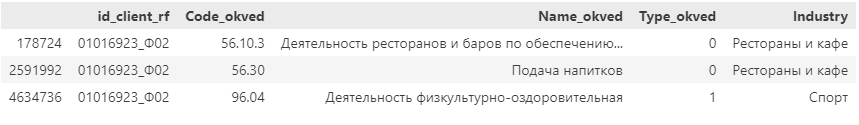

В таблице **sales** было несколько продаж:

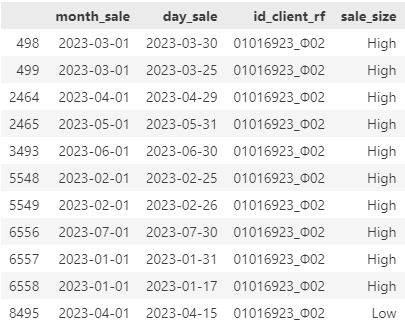

В **base_info_client** одна запись:

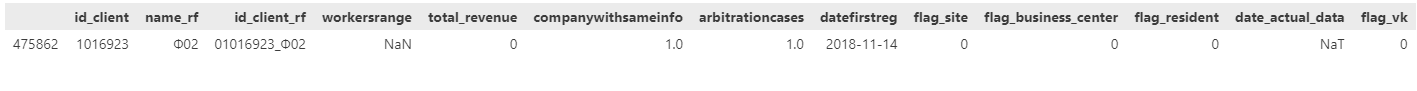

В **address_client** нет записей:

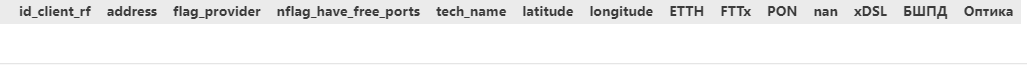

In [17]:
#оставляем только основную деятельность
okved = okved_industry_client[okved_industry_client['Type_okved'] == 1]

final_data_sales = sales_clients.merge(okved, how='left', on='id_client_rf')\
                  .merge(base_info_client, how='left', on='id_client_rf')\
                  .merge(address_client, how='left', on='id_client_rf')\
                  .merge(df_delta_date[['delta_date', 'id_client_rf']], how='left', on='id_client_rf')

In [ ]:
# final_data_sales['id_client_rf'].value_counts()
# final_data_sales[final_data_sales['id_client_rf']=='01016923_Ф02']
address_client[address_client['id_client_rf']=='01016923_Ф02']
# okved_industry_client[okved_industry_client['id_client_rf']=='01016923_Ф02']

In [41]:
df = sales_clients.merge(okved, how='left', on='id_client_rf').merge(base_info_client, how='left', on='id_client_rf').merge(df_delta_date[['delta_date', 'id_client_rf']], how='left', on='id_client_rf')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9316 entries, 0 to 9315
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   id_client_rf          9316 non-null   object        
 1   month_sale            9316 non-null   datetime64[ns]
 2   sale_size             9316 non-null   int32         
 3   sale_count            9316 non-null   int64         
 4   Code_okved            9296 non-null   object        
 5   Name_okved            9296 non-null   object        
 6   Type_okved            9296 non-null   float64       
 7   Industry              9296 non-null   object        
 8   id_client             9316 non-null   int64         
 9   name_rf               9316 non-null   object        
 10  workersrange          0 non-null      float64       
 11  total_revenue         9316 non-null   int64         
 12  companywithsameinfo   4032 non-null   float64       
 13  arbitrationcases  

In [40]:
# address_client['id_client_rf'].value_counts()
# address_client[address_client['id_client_rf']=='00997214_Ф02']
df_delta_date.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9316 entries, 0 to 9315
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   id_client_rf          9316 non-null   object        
 1   month_sale            9316 non-null   datetime64[ns]
 2   sale_size             9316 non-null   int32         
 3   sale_count            9316 non-null   int64         
 4   id_client             9316 non-null   int64         
 5   name_rf               9316 non-null   object        
 6   workersrange          0 non-null      float64       
 7   total_revenue         9316 non-null   int64         
 8   companywithsameinfo   4032 non-null   float64       
 9   arbitrationcases      1794 non-null   float64       
 10  datefirstreg          9164 non-null   datetime64[ns]
 11  flag_site             9316 non-null   int64         
 12  flag_business_center  9316 non-null   int64         
 13  flag_resident     

In [5]:
train_data = pd.read_csv(r'C:\WORK\STUDY\GIT\Данные для хакатона\train_data.csv')
print(train_data.info())
train_data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17164 entries, 0 to 17163
Data columns (total 70 columns):
 #   Column                                                                        Non-Null Count  Dtype  
---  ------                                                                        --------------  -----  
 0   id_client_rf                                                                  17164 non-null  object 
 1   month_sale                                                                    17164 non-null  object 
 2   sale_size                                                                     17164 non-null  float64
 3   sale_count                                                                    17164 non-null  float64
 4   Code_okved                                                                    17120 non-null  float64
 5   Name_okved                                                                    17120 non-null  object 
 6   Type_okved                    

C:\Users\anton.bakhmetev\AppData\Local\Temp\ipykernel_17472\3554164338.py:1: DtypeWarning: Columns (1,29,30,31,32,33,34,35) have mixed types. Specify dtype option on import or set low_memory=False.
  train_data = pd.read_csv(r'C:\WORK\STUDY\GIT\Данные для хакатона\train_data.csv')


id_client_rf           month_sale  sale_size  sale_count  Code_okved  \
0  01017082_Ф02  2023-01-01 00:00:00        3.0        11.0        96.0   
1  01016923_Ф02  2023-01-01 00:00:00        3.0        11.0        96.0   
2  00287063_Ф06  2023-01-01 00:00:00        3.0         8.0        47.0   
3  00287187_Ф06  2023-01-01 00:00:00        3.0         8.0        47.0   
4  00896607_Ф02  2023-01-01 00:00:00        3.0         7.0        68.0   

                                          Name_okved  Type_okved  id_client  \
0          Деятельность физкультурно-оздоровительная         1.0    1017082   
1          Деятельность физкультурно-оздоровительная         1.0    1016923   
2  Торговля розничная непродовольственными товара...         1.0     287063   
3  Торговля розничная непродовольственными товара...         1.0     287187   
4  Аренда и управление собственным или арендованн...         1.0     896607   

  name_rf  workersrange  ...  Industry_Службы доставки  Industry_Спорт  \
0     Ф02           0.0  ...                     False            True   
1     Ф02           0.0  ...                     False            True   
2     Ф06           0.0  ...                     False           False   
3     Ф06           0.0  ...                     False           False   
4     Ф02           0.0  ...                     False           False   

   Industry_Строительство Industry_Транспорт/Логистика  Industry_Туризм  \
0                   False                        False            False   
1                   False                        False            False   
2                   False                        False            False   
3                   False                        False            False   
4                   False                        False            False   

   Industry_Тяжелая промышленность  Industry_Услуги Industry_Финансы  \
0                            False            False            False   
1                            False            False            False   
2                            False            False            False   
3                            False            False            False   
4                            False            False            False   

   Industry_Энергетика  has_nearby_company  
0                False                   0  
1                False                   0  
2                False                   1  
3                False                   1  
4                False                   0  

[5 rows x 70 columns]

In [6]:
# Функция определения ближайших компаний
from tqdm.notebook import tqdm
from math import radians, sin, cos, sqrt, atan2
pbar = tqdm()
def haversine(lat1, lon1, lat2, lon2):
    R = 6371  # radius of the earth in km
    dlat = radians(lat2 - lat1)
    dlon = radians(lon2 - lon1)
    a = sin(dlat / 2) ** 2 + cos(radians(lat1)) * cos(radians(lat2)) * sin(dlon / 2) ** 2
    c = 2 * atan2(sqrt(a), sqrt(1 - a))
    return R * c * 1000  # distance in meters

train_data['has_nearby_company'] = 0

pbar.reset(total=len(train_data))
for i, row in train_data.iterrows():
    lat1, lon1 = row['latitude'], row['longitude']
    for j, other_row in train_data.iterrows():
        if i != j:
            lat2, lon2 = other_row['latitude'], other_row['longitude']
            dist = haversine(lat1, lon1, lat2, lon2)
            if dist <= 50:
                train_data.at[i, 'has_nearby_company'] = 1
                break
    pbar.update()             
pbar.refresh()

train_data.to_csv(r'C:\WORK\STUDY\GIT\Данные для хакатона\train_data_new.csv')
train_data.head()

0it [00:00, ?it/s]